In [2]:
import pandas as pd
import numpy as np
from scipy.stats import fisher_exact, chisquare
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
# sharper plots
%config InlineBackend.figure_format = 'retina'

import plotly.express as px
import os, re

In [4]:
vk = pd.read_csv("E:\\.ML\\[Анатолий Карпов] [Stepic] Data Analytic Часть 1\\7\\Задания\\karpov_courses_test.csv", parse_dates=['date'])
vk.head()

,date,browser,user_type,users
0,2020-06-14,Google Chrome,People,139
1,2020-06-14,Chrome Mobile,People,35
2,2020-06-14,Google Chrome,Robots,28
3,2020-06-14,Yandex Browser,People,22
4,2020-06-14,Firefox,People,15


In [9]:
np.where(vk.browser.str.contains("Chrome") & vk.user_type.str.contains("Robots"))

(array([ 2, 19], dtype=int64),)

In [17]:
sample_ads = pd.read_csv("E:\\.ML\\[Анатолий Карпов] [Stepic] Data Analytic Часть 1\\7\\Задания\\sample_ads.csv")
sample_ads[sample_ads.click_type.isna()==False].size

33

#### Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. Данные для построения графика хранятся здесь.

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


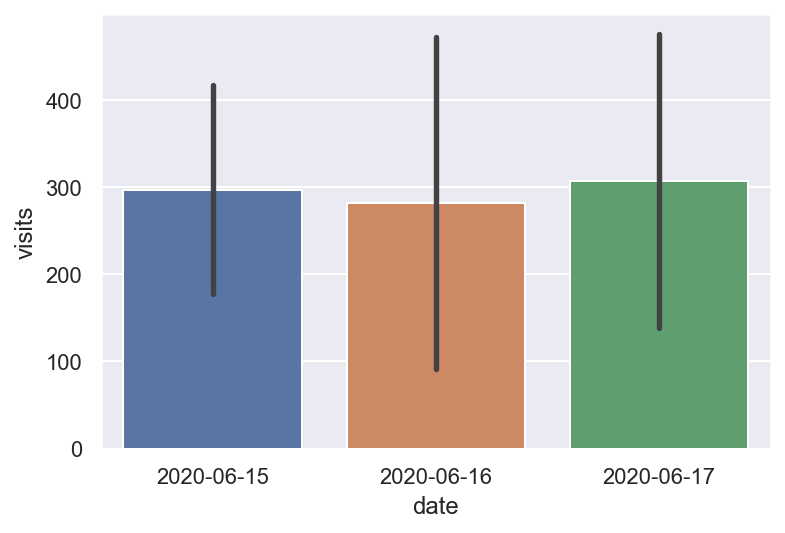

In [26]:
ads_1 = pd.read_csv("E:\\.ML\\[Анатолий Карпов] [Stepic] Data Analytic Часть 1\\7\\Задания\\Минипроект\\step_1_lesson_7.csv", date_parser=['date'])
sns.barplot(data=ads_1, x='date', y='visits')
ads_1

#### Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome.

In [38]:
ads_2 = pd.read_csv("E:\\.ML\\[Анатолий Карпов] [Stepic] Data Analytic Часть 1\\7\\Задания\\Минипроект\\step_2_lesson_7.csv", date_parser=['date'])
ads_2[ads_2.browser.str.contains("Chrome")].shape[0] / ads_2.shape[0] * 100

13.333333333333334

In [46]:
ads_3 = pd.read_csv("E:\\.ML\\[Анатолий Карпов] [Stepic] Data Analytic Часть 1\\7\\Задания\\Минипроект\\step_3_lesson_7.csv", date_parser=['date'])
ads_3[ads_3.user_type == "Robots"].groupby('browser', as_index=False).agg({'visits':'sum'}).sort_values('visits').tail(1)

,browser,visits
3,Google Chrome,104.0


In [12]:
ads_4 = pd.read_csv("E:\\.ML\\[Анатолий Карпов] [Stepic] Data Analytic Часть 1\\7\\Задания\\Минипроект\\step_4_lesson_7.csv", date_parser=['date'])
visit_fraction = ads_4.groupby(['date','user_type','browser'], as_index=False)\
                    .agg({'visits':'sum'}).sort_values(['date','user_type', 'visits']) #visits / ads_4.visits.sum()

In [53]:
piv = visit_fraction.pivot_table(index=['date', 'browser'], columns='user_type', values='visits')

date_browser_user_type_fractions = piv.div(piv.sum(axis=1), axis=0)
date_browser_user_type_fractions.reset_index()

user_type,date,browser,People,Robots
0,2020-06-15,Android Browser,1.000000,NaN
1,2020-06-15,Chrome Mobile,1.000000,NaN
2,2020-06-15,Chromium,0.500000,0.500000
3,2020-06-15,CocCoc,1.000000,NaN
4,2020-06-15,Edge,0.800000,0.200000
5,2020-06-15,Firefox,0.465517,0.534483
6,2020-06-15,Google Chrome,0.706215,0.293785
7,2020-06-15,Mobile Safari,0.937500,0.062500
8,2020-06-15,Opera,0.687500,0.312500
9,2020-06-15,Safari,0.463415,0.536585


In [68]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [71]:
ads_4.merge(df, on=['date','browser','user_type'])

,date,browser,user_type,visits,visit_fraction,users
0,2020-06-15,Google Chrome,People,250.0,0.001684,240.0
1,2020-06-15,Google Chrome,Robots,104.0,0.052189,104.0
2,2020-06-15,Yandex Browser,People,47.0,0.001684,44.0
3,2020-06-15,Firefox,Robots,31.0,0.001684,29.0
4,2020-06-15,Chrome Mobile,People,31.0,0.001684,30.0
5,2020-06-15,Firefox,People,27.0,0.006734,26.0
6,2020-06-15,Safari,Robots,22.0,0.001684,20.0
7,2020-06-15,Safari,People,19.0,0.045455,17.0
8,2020-06-15,Mobile Safari,People,15.0,0.052189,14.0
9,2020-06-15,Opera,People,11.0,0.420875,10.0
